## Introduction

In this project, I'll explore using the pandas plotting functionality along with the Jupyter notebook interface to explore and visualiz data

I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* nk - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

# first row formatted as a table.
print (recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [32]:
# to become familiar with how data is structured
print (recent_grads.head())
print (recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [33]:
#  to generate summary statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [34]:
#shape before dropping NAN vaues
print(recent_grads.shape)


(173, 21)


In [35]:
# Investigating Missing Values
print(recent_grads.isnull().sum())


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


In [36]:

#recent_grads = recent_grads.dropna(inplace=True)
print(recent_grads.dropna(inplace=True))
print(recent_grads.shape)

None
(172, 21)


In [37]:
# #Investigating Missing Values after dropping NAN
print(recent_grads.isnull().sum())

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64


In [38]:
# #shape before dropping NAN vaues
# print(recent_grads.shape)

# #Investigating Missing Values
# print(recent_grads.isnull().sum())

# #Drop missing values
# print(recent_grads.dropna(inplace =True))

# #shape after dropping NAN vaues
# print(recent_grads.shape)

# #Investigating Missing Values after dropping NAN
# print(recent_grads.isnull().sum())

In [39]:

#recent_grads = recent_grads.dropna(inplace=True)
#print(recent_grads.dropna(inplace=True))


In [40]:
#recent_grads = recent_grads.dropna(inplace=True)
#print(recent_grads.dropna(inplace=True))


In [41]:
#print(recent_grads.shape)

## Investigating Missing Values

In [42]:

# # Look up the number of rows
# raw_data_count = recent_grads.count()
# print (raw_data_count)

# # Drop rows with missing values
# # recent_grads = recent_grads.dropna(axis=0, inplace=True)
# print(recent_grads.shape)


In [43]:
# # Look up the number of rows to ascertain if data has been droped
# cleaned_data_count = recent_grads.count()
# print (cleaned_data_count)

Comparing the raw data and cleaned data, it will be observed that number of rows droped to 172 in cleaned data. While raw data has 173 rows. This means a row has been removed for having missing value.

## Scatter Plot

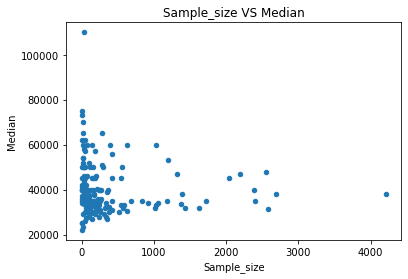

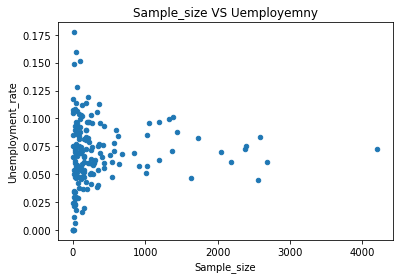

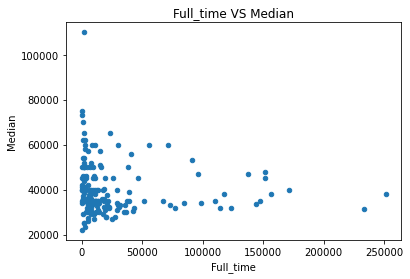

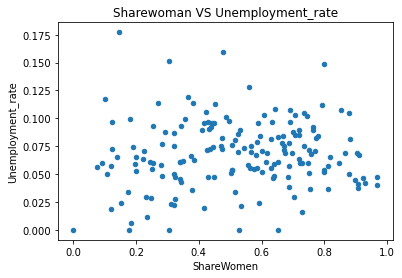

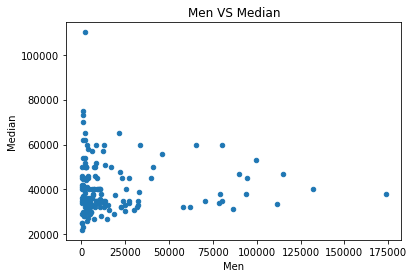

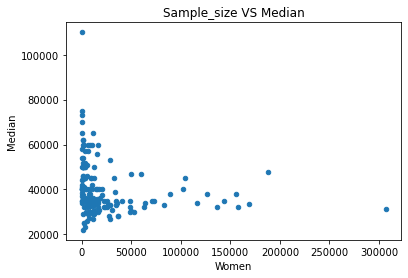

In [44]:
recent_grads.plot(x="Sample_size", y="Median", kind = "scatter", title = "Sample_size VS Median")
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind = "scatter", title = "Sample_size VS Uemployemny")
recent_grads.plot(x="Full_time", y="Median", kind = "scatter", title = "Full_time VS Median")
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind = "scatter", title = "Sharewoman VS Unemployment_rate")
recent_grads.plot(x="Men",y="Median", kind = "scatter", title = "Men VS Median")
recent_grads.plot(x="Women",y="Median", kind = "scatter", title = "Sample_size VS Median")

There seems to be no significant relationships between the data points in these scatter plots. Theycan be explore further using histograms instead.

The y axis shows the frequency of the data and the x axis refers to the column name specified in code.

## Histograms

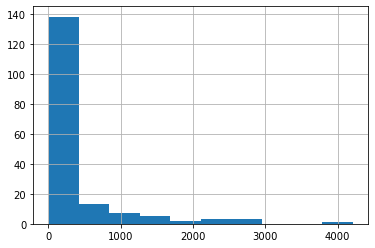

In [45]:
recent_grads["Sample_size"].hist()

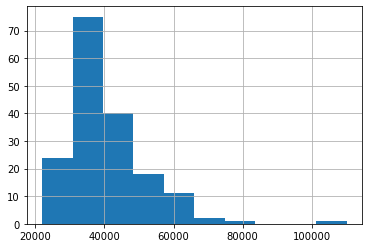

In [46]:
recent_grads["Median"].hist()

The most common median salary range is $30,000-40,000. 



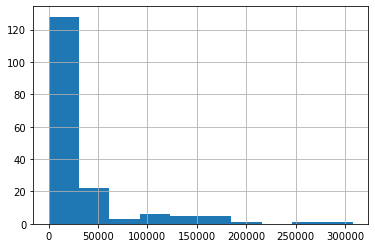

In [47]:
recent_grads["Employed"].hist()


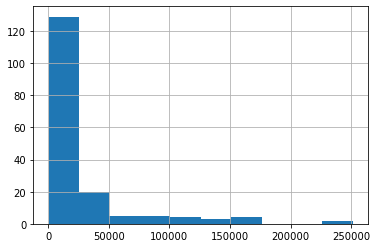

In [48]:
recent_grads["Full_time"].hist()

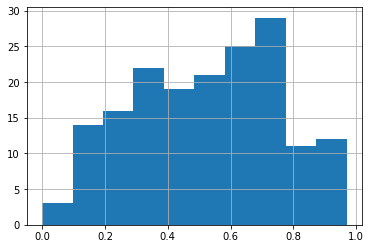

In [49]:
recent_grads["ShareWomen"].hist()

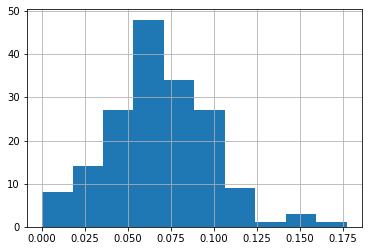

In [50]:
recent_grads["Unemployment_rate"].hist()

The most common percentage of unemployment rate is between 5.5-7%.



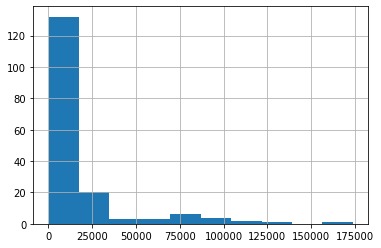

In [51]:
recent_grads["Men"].hist()


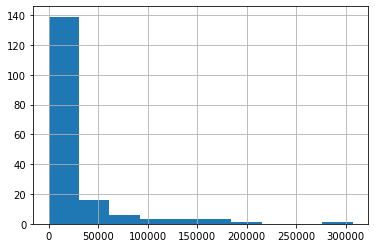

In [52]:
recent_grads["Women"].hist()


## Scatter matrix plot

In other to explore the data further, both scatter plots and histograms are combined into one grid of plots so as to explore potential relationships and distributions simultaneously. This is achieved using scatter matrix plot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011B6CD30>,
      dtype=object)

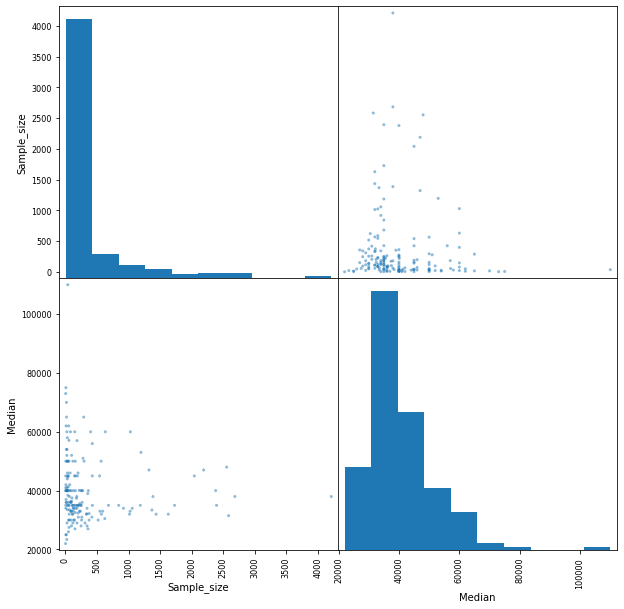

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011ADAC10>,
      dtype=object)

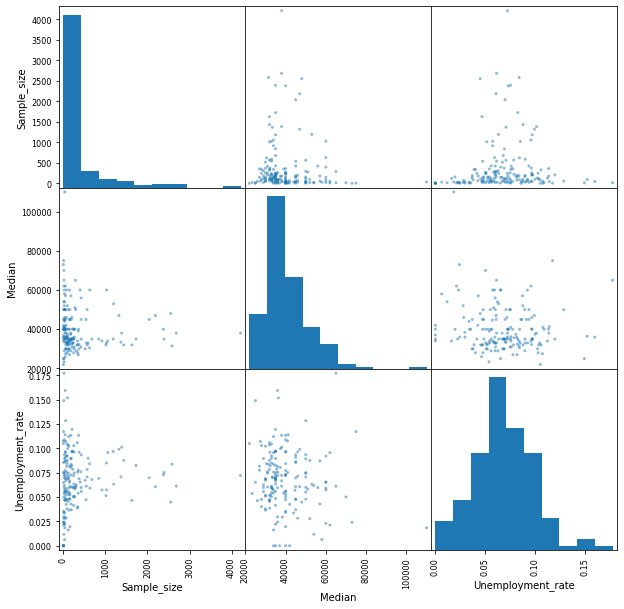

In [54]:
scatter_matrix(recent_grads[["Sample_size", "Median","Unemployment_rate"]], figsize=(10,10))

Looking keenly at the `scatter matrix plot`,  it is difficult to ascertain any correlation between any pair of these columns. Looking at the histograms, the distribution of Sample_size and Median is skewed whereas the distribution of Unemployment_rate is more symetrically disbributed and more spread out.

## Exploring data with pandas Bar plots

Bar chart ploting  only need the data that needs to be represented the bars and the labels for each bar.


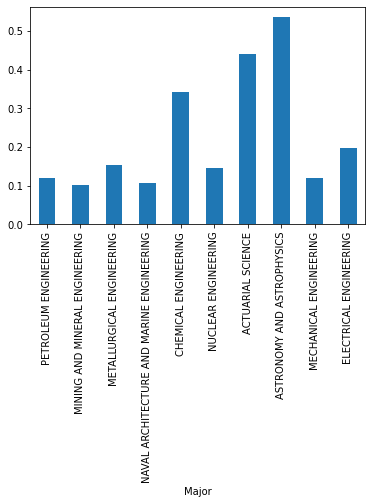

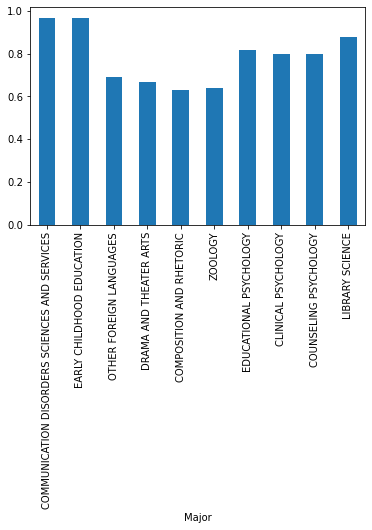

In [58]:
recent_grads[:10].plot.bar(x="Major", y="ShareWomen", legend=False)
recent_grads[-10:].plot.bar(x="Major", y="ShareWomen", legend=False)

Women tend to shy away from technical courses such as Engineering. Engineering courses are the least subscribed for by women as shown in the above chart while Early childhood education is the most subcribed course by women.

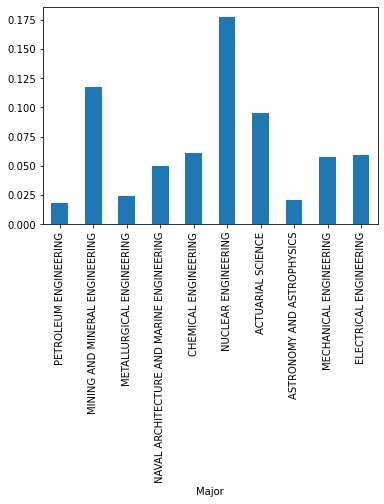

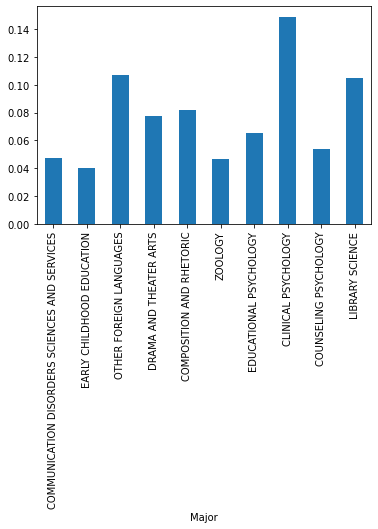

In [60]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate", legend=False)
recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate", legend=False)

Women in Engineering Majors tend to enjoy low unemployment rate except for 'Nuclear Engineering' and 'Mining and Mineral Engineering'. This may be due to high technically and limited opening for for the two majors.

## Exploring with Grouped Bar Charts

Grouped bar plot will be used to compare the number of men with the number of women in each category of majors.

In [86]:
# Men and Women are aggregated by Major_category to a single dictionary.

men_sum_dict = {}
women_sum_dict = {}
    
for c in recent_grads["Major_category"].unique():
    
    men_cat = recent_grads.loc[recent_grads["Major_category"] == c, "Men"].sum()
    men_sum_dict[c] = men_cat
    
    women_cat = recent_grads.loc[recent_grads["Major_category"] == c, "Women"].sum()
    women_sum_dict[c] = women_cat
    
    # convertion of men_sum_dict and women_sum_dict to series
men_sum_series = pd.Series(men_sum_dict)
women_sum_series = pd.Series(women_sum_dict)
    
    # convertion of men_sum_series and women_sum_series to DataFrame
men_women_df = pd.DataFrame(men_sum_series, columns=["Men Total"])
men_women_df["Women Total"] = women_sum_series
men_women_df
    


,Men Total,Women Total
Engineering,408307.0,129276.0
Business,667852.0,634524.0
Physical Sciences,95390.0,90089.0
Law & Public Policy,91129.0,87978.0
Computers & Mathematics,208725.0,90283.0
Industrial Arts & Consumer Services,103781.0,126011.0
Arts,134390.0,222740.0
Health,75517.0,387713.0
Social Science,256834.0,273132.0
Biology & Life Science,184919.0,268943.0


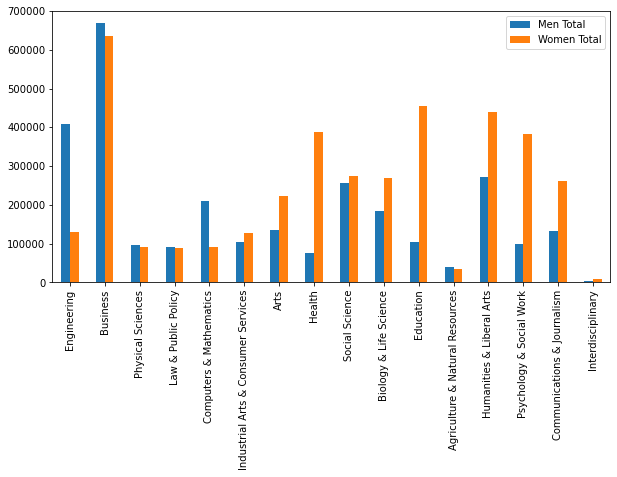

In [90]:
men_women_df.plot.bar(figsize=(10,5))

There is a significant difference in the number of Men and women in Engineering and Computers & Mathematics Majors. Men are seen have the highest enrolment.However, Arts, Health, Biology & Life Science, Education, Humanities & Liberal Arts, Psychology & Social Work and Communications & Journalism have significantly more women than men.

## Exploring with Boxplots 

Boxplots can show us the range and positions of the quartiles for columns in the dataset. Box plot is used here to explore `Median` and `Unemployment_rate` columns a little more.

Median                  AxesSubplot(0.125,0.125;0.352273x0.755)
Unemployment_rate    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

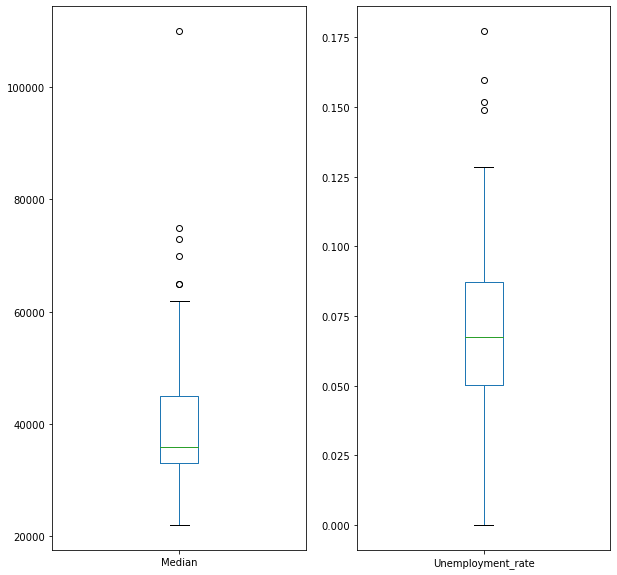

In [93]:
recent_grads.loc[:, ["Median", "Unemployment_rate"]].plot(kind='box', subplots=True, figsize=(10, 10))

There are five outliers in the median salary salary column of the data with four being moderate outliers and one being an extreme outlier.

The Unemployment rate is more symmetrically distributed about the median of around 7%. There are four outliers with high unemployment rates of approximately 13.5-19%.

## Exploring with Hexagonal Bin Plot

In other to explore the data a little more, hexagonal bin plot is used to establish relationship between pair of columns. 

Here relationship between the following are visualised:
* ShareWomen vs. Unemployment_rate 
* Woman vs. Median
* Total vs. Median.

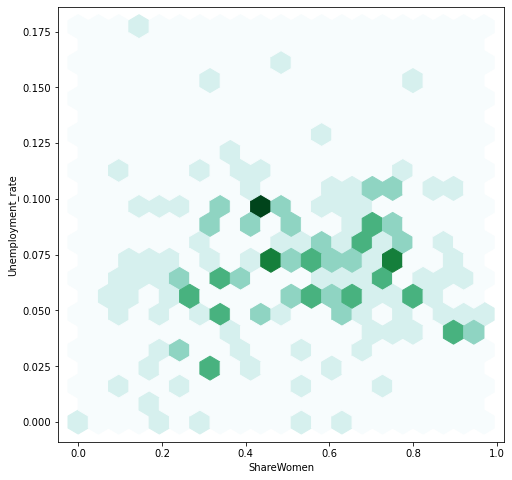

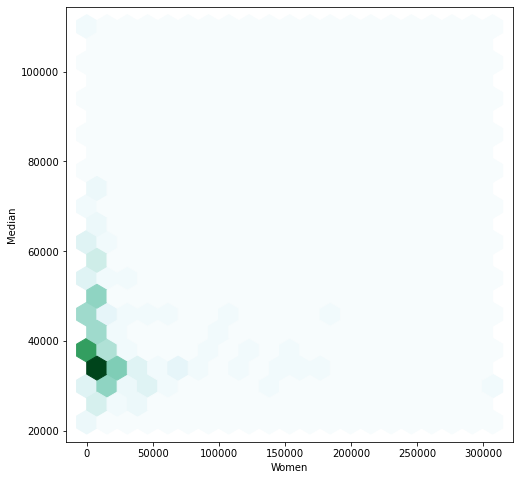

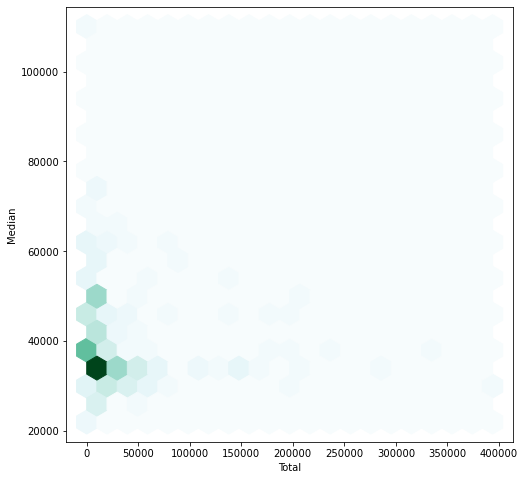

In [95]:
recent_grads.plot.hexbin("ShareWomen", "Unemployment_rate", figsize=(8, 8), gridsize=20, colorbar=False) 
recent_grads.plot.hexbin("Women", "Median", figsize=(8, 8), gridsize=20, colorbar=False) 
recent_grads.plot.hexbin("Total", "Median", figsize=(8, 8), gridsize=20, colorbar=False) 

## Conclusion

Exploring data of graduated American College students was insightful and it gives eye catching details for quick understanding. For clearity, various forms of charts were used. Specifically, some Python concepts explored are pandas, matplotlib, histograms, bar charts, scatterplots, scatter matrices, box plot and hexagonal bin plot. 
